# Tasca del test d'hipòtesis

# Nivell 1
### Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [84]:
import pandas as pd
from scipy.stats import normaltest
from scipy.stats import ttest_1samp
import statistics
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
df=pd.read_csv('MLB.txt',sep='\t')

In [9]:
#visualizo 5 primeras lineas del fichero
df.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [10]:
#Resumen confiso del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    828 non-null    object 
 1   team      828 non-null    object 
 2   position  828 non-null    object 
 3   salary    828 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.0+ KB


In [14]:
#Obtengo los datos de la estadistica descriptiva
df.describe()

,salary
count,828.000000
mean,3281.828339
std,4465.448980
min,400.000000
25%,418.315000
50%,1093.750000
75%,4250.000000
max,33000.000000


In [26]:
df.describe(include='all')

,player,team,position,salary
count,828,828,828,828.000000
unique,828,30,9,NaN
top,Rusty Ryal,Oakland Athletics,Pitcher,NaN
freq,1,31,410,NaN
mean,NaN,NaN,NaN,3281.828339
std,NaN,NaN,NaN,4465.448980
min,NaN,NaN,NaN,400.000000
25%,NaN,NaN,NaN,418.315000
50%,NaN,NaN,NaN,1093.750000
75%,NaN,NaN,NaN,4250.000000


In [8]:
df.shape

(828, 4)

In [16]:
df.isnull().sum()

player      0
team        0
position    0
salary      0
dtype: int64

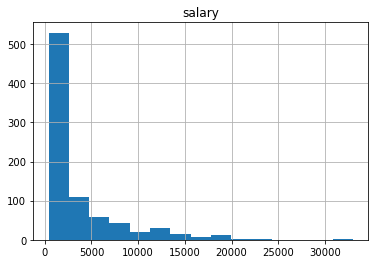

In [56]:
hist = df.hist(bins=15)

Como se puede observar en la grafica el salario no sigue la distribucion normal

* H0 La variable salary sigue la distribucion normal y los datos son independientes
* H1 La variable no sigue la distribucion normal los dados son depentientes hay alguna relacion entre ellos

In [28]:
alfa=0.05

In [36]:
stat,p=normaltest(df.salary)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probabilidad es Gaussiana')
else:
    print('Probabilidad no es Gaussiana')


stat=379.781, p=0.000
Probabilidad no es Gaussiana


P valor es 0, los datos son dependientes y se rechaza la hipótesis nula H0
El resultado confirma lo que se ha observado en el histograma, la distribucion no es Gaussiana


* H0 Salario medio del jugador 3281.82
* H1 Salario medio del jugador no es 3281.82

Usare el critero de T-student para comprobar la hipótesis

In [66]:
print("Salario medio del jugador", statistics.mean(df.salary))
tset, pval = ttest_1samp(df.salary, 3281.82)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" No acepto hipótesis nula")
else:
  print("Acepto la H0 hipótesis nula")

Salario medio del jugador 3281.8283393719807
p-values 0.9999571360531264
Acepto la H0 hipótesis nula


# Nivell 2
### Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Test de anova del salario agrupando por posicion

* H0 Los salarios medios por posiciones son iguales
* H1 Los salarios medios por posiciones no son iguales

<AxesSubplot:title={'center':'salary'}, xlabel='position'>

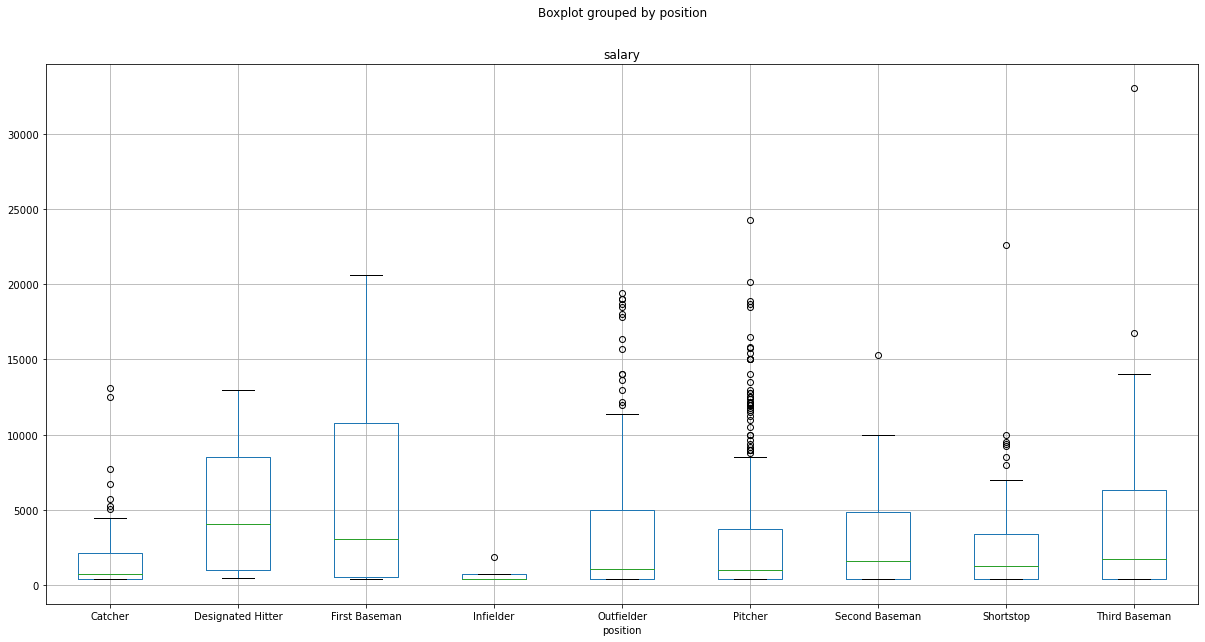

In [54]:
df.boxplot('salary', by='position', figsize=(20, 10))

In [67]:
df.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [82]:
model = ols('salary ~ position', data = df).fit()


In [85]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
position,6.097532e+08,8.0,3.930746,0.000142
Residual,1.588082e+10,819.0,NaN,NaN


El p-valor es casi 0, esto implica descartar la hipótesis nula H0. También  se puede ver en la grafica de boxplot los datos que confirman que la H0 no es cierta. Por ejemplo los pitcher o outfilder


# Nivell 3
### Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Test de anova del salario de la posicion 'Pitcher' agrupando por equipo
* H0 Los salarios medios por posiciones son iguales
* H1 Los salarios medios por posiciones no son iguales

In [110]:
df.groupby('position').sum()

,salary
position,
Catcher,129793.766
Designated Hitter,36650.000
First Baseman,244713.873
Infielder,3082.300
Outfielder,555581.079
Pitcher,1229670.831
Second Baseman,145090.691
Shortstop,159272.186
Third Baseman,213499.139


In [104]:
res=df.groupby(['position','team']).sum()
res.describe()

,salary
count,215.000000
mean,12638.855186
std,15314.514642
min,400.000000
25%,2396.588500
50%,6535.300000
75%,15504.607000
max,86882.989000


In [133]:
df.groupby('team').sum()

,salary
team,
Arizona Diamondbacks,60718.166
Atlanta Braves,84423.666
Baltimore Orioles,81612.500
Boston Red Sox,162447.333
Chicago Cubs,146609.000
Chicago White Sox,105530.000
Cincinnati Reds,71761.542
Cleveland Indians,61203.966
Colorado Rockies,83821.000


In [142]:
Pitcher = df[df['position'] == 'Pitcher']


In [143]:
Pitcher.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
5,Chad Qualls,Arizona Diamondbacks,Pitcher,4185.0
10,Aaron Heilman,Arizona Diamondbacks,Pitcher,2150.0


In [144]:
Pitcher.shape

(410, 4)

In [145]:
Pitcher.describe()

,salary
count,410.000000
mean,2999.197149
std,4102.627814
min,400.000000
25%,415.625000
50%,1000.000000
75%,3768.750000
max,24285.714000


In [146]:
mod = ols('salary ~ team', data = Pitcher).fit()
anova = sm.stats.anova_lm(mod, typ=2)
anova

,sum_sq,df,F,PR(>F)
team,7.338338e+08,29.0,1.563468,0.034136
Residual,6.150272e+09,380.0,NaN,NaN


Valor de p-value es 0.0341 < que alpha 0.05 esto implica la descartar la hipótesis H0 nula


<AxesSubplot:title={'center':'salary'}, xlabel='team'>

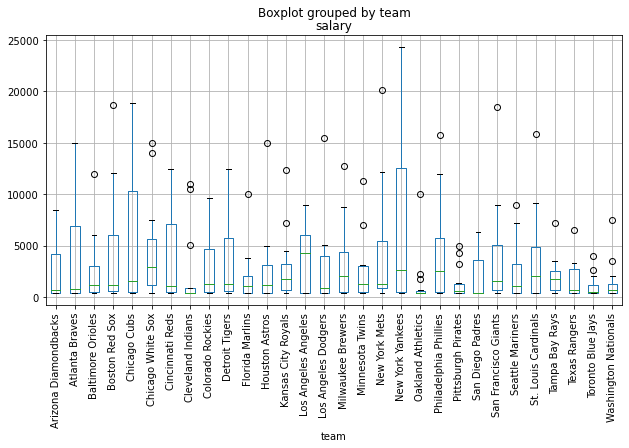

In [165]:
#boxplot de salario de Pitcher por equipo
Pitcher.boxplot('salary', by='team', figsize=(10, 5), rot=90)

El grafico boxplot confirma el rechazo de la hipótesis Ho. Por ejemplo mirando los equipos de Arizona Diamondbacks y Chicago White Sox